# <div style="text-align: center"> Convex optimization for machine learning: Part I</div>
#### <div style="text-align: right"> Prof. Changho Suh, TA Gyeongjo Hwang, Doyeon Kim</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Least-squares classifier

## 1-1. Synthetic data generation
- 본 실습의 진행에 앞서 우선 합성데이터(synthetic data)를 생성.
- 합성데이터는 $\mathbb{R}^2$에서 정의되는 두 개의 정규분포를 사용함.

In [24]:
# 정규분포를 따르는 합성데이터 생성함수 정의
def generate_normal(n_samples, train_test_ratio=0.8, seed=2019):
    np.random.seed(seed)
    n = n_samples // 2
    n_train = int(n * train_test_ratio)
    X1 = np.random.normal(loc=10, scale=5, size=(n, 2))
    X2 = np.random.normal(loc=20, scale=5, size=(n, 2))
    Y1 = np.ones(n)
    Y2 = - np.ones(n)
    X_train = np.concatenate((X1[:n_train], X2[:n_train]))
    X_test = np.concatenate((X1[n_train:], X2[n_train:]))
    Y_train = np.concatenate((Y1[:n_train], Y2[:n_train]))
    Y_test = np.concatenate((Y1[n_train:], Y2[n_train:]))
    return (X_train, Y_train), (X_test, Y_test)

In [25]:
# 데이터 플롯 함수 정의
def plot(data, labels, title='Train data'):
    plt.scatter(data[labels==1][:, 0], data[labels==1][:, 1], color='b', edgecolor='k', label='label : 1')
    plt.scatter(data[labels==-1][:, 0], data[labels==-1][:, 1], color='r', edgecolor='k', label='label : -1')
    plt.axvline(x=0, color='k')
    plt.axhline(y=0, color='k')
    plt.grid(True)
    plt.title(title)
    plt.legend()

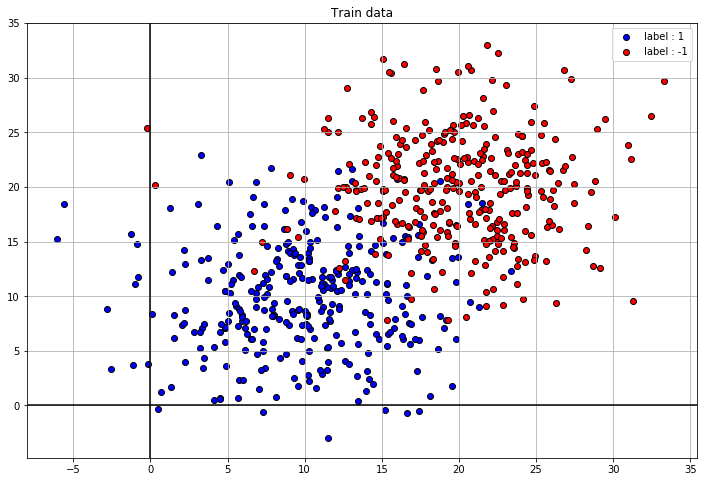

In [26]:
(X_train, Y_train), (X_test, Y_test) = generate_normal(800)
plot(X_train, Y_train)

In [27]:
# 데이터의 평균과 표준편차가 각각 0과 1이 되도록 정규화하는 함수
def Normalize(data):
    return (data - data.mean()) / data.std()

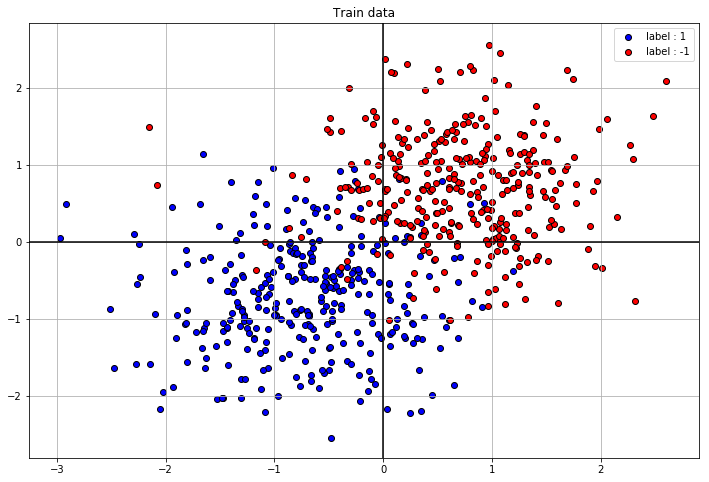

In [28]:
X_train = Normalize(X_train)
plot(X_train, Y_train)

- Classification 문제는 주어진 데이터가 선형함수로 잘 나누어지는 경우(separable case)와 그렇지 않은 경우(non-separable case)로 나누어 생각해볼 수 있는데, non-separable case에서는 선형함수를 사용한 예측값과 관측값 사이의 편차를 최소화하는 문제로 치환.
- Least-squares classifier는 (이름을 통해 예상할 수 있듯이) 관측값과 예측값 사이의 제곱편차(squared error)를 최소화하는 문제로 치환.
- 데이터 $(x_1, y_1), (x_2, y_2), \dots (x_m, y_m),$가 주어졌을 때, least-squares classifier는 다음과 같이 $w$라는 매개변수를 가진 함수로 나타낼 수 있음.
<img src="./figures/LS1.png" width="500" height="500"/>

$\mathrm{min}_{x}||Ax - b||^2$

---
* Least Square를 위한 클래스 정의

@, .T, linalg.inv

In [29]:
class LeastSquare:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels.reshape(-1, 1)
        
    def fit(self):
        #################### your code here ####################
        self.w = (np.linalg.inv(self.data.T@self.data)@self.data.T)@self.labels
        ########################################################
        
    def predict(self, data):
        #################### your code here ####################
        x = data.dot(self.w)
        ########################################################
        return x
    
    def get_accuracy(self, data, labels):
        z = self.predict(data)
        #################### your code here ####################
        yhat = np.sign(z)
        n_samples = len(labels)
        n_correct = (yhat == labels.reshape(-1, 1)).sum()
        acc = n_correct / n_samples * 100
        ########################################################
        return acc

In [30]:
# Least square 인스턴스 생성 및 학습
model = LeastSquare(X_train, Y_train)
model.fit()
train_acc = model.get_accuracy(X_train, Y_train) # Train 데이터에 대한 성능
print('Train accuracy : {}%'.format(train_acc))

Train accuracy : 92.8125%


In [31]:
# Decision boundary를 그리는 함수정의
# meshgrid 메소드이용
def decision_boundary(model, xlim, ylim, colormap):
    xmin, xmax = xlim
    ymin, ymax = ylim
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 30), np.linspace(ymin, ymax, 30))
    grids = np.c_[xx.ravel(), yy.ravel()]
    predict = model.predict(grids)
    Z = predict.reshape(xx.shape)
    if colormap == True:
        plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.7)
    else:
        plt.contour(xx, yy, Z, levels=0, colors='k')
    
def draw_boundary(data, labels, model, title='Train data', colormap=False):
    # 먼저 데이터 플롯한다
    plot(data, labels)
    axes = plt.gca() # 현재 플롯된 axes객체를 가져온다
    xlim = axes.get_xlim()
    ylim = axes.get_ylim()
    # 학습모델의 Decision boundary
    decision_boundary(model, xlim, ylim, colormap)

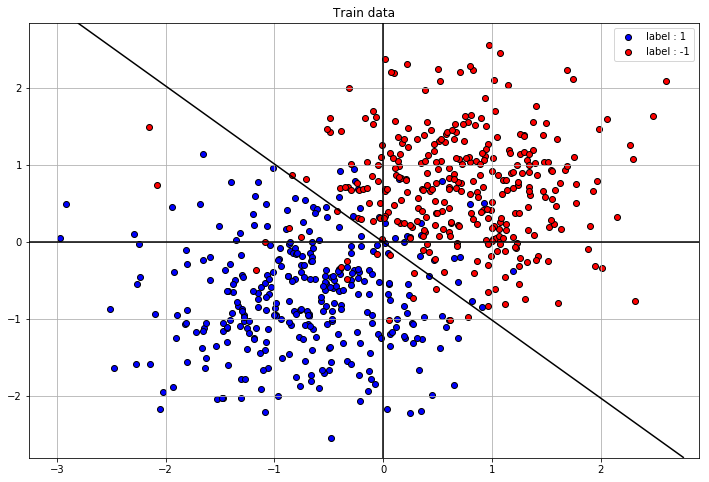

In [32]:
draw_boundary(X_train, Y_train, model)

---
- Test 데이터에 대한 성능

색의 진하기에 따라 prediction에 대한 confidence가 다름

Test accuracy : 90.0%


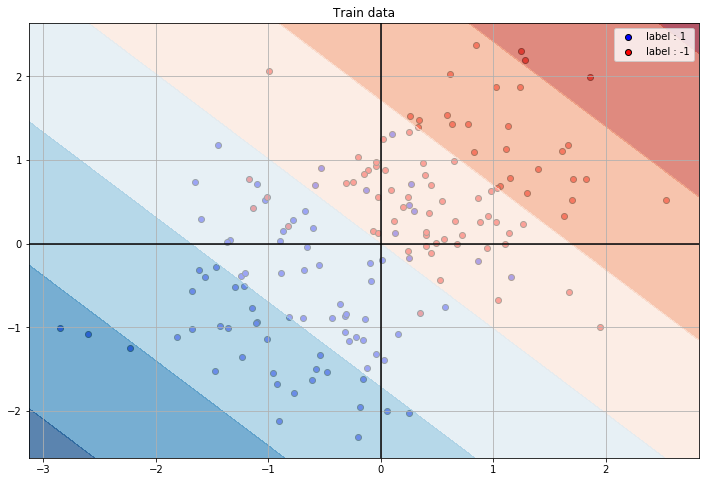

In [35]:
# Test데이터도 위와 마찬가지로 정규화를 해주어야 한다.
X_test = Normalize(X_test)
test_acc = model.get_accuracy(X_test, Y_test) # Test 데이터에 대한 성능
print('Test accuracy : {}%'.format(test_acc))
draw_boundary(X_test, Y_test, model, 'Test data', True)
# draw_boundary(X_test, Y_test, model, 'Test data', False)

---
## 1-2 bias항 추가

- 부연설명 추가 필

In [645]:
class LeastSquare:
    def __init__(self, data, labels, bias=False):
        if bias == True:
            self.data = self.add_bias(data)
        else:
            self.data = data
        self.labels = labels.reshape(-1, 1)
        self.bias = bias
        
    def fit(self):
        ################## ctrl c+v your code ##################
        self.w = (np.linalg.inv(self.data.T@self.data)@self.data.T)@self.labels
        ########################################################
        
    def predict(self, data):
        #################### your code here ####################
        if self.bias == True:
            data = self.add_bias(data)
        x = data.dot(self.w)
        ########################################################
        return x
    
    def get_accuracy(self, data, labels):
        z = self.predict(data)
        ################## ctrl c+v your code ##################
        yhat = np.sign(z)
        n_samples = len(labels)
        n_correct = (yhat == labels.reshape(-1, 1)).sum()
        acc = n_correct / n_samples * 100
        ########################################################
        return acc
    
    def add_bias(self, data):
        #################### your code here ####################
        x = np.concatenate((data, np.ones((len(data), 1))), axis=1)
        ########################################################
        return x

### - 데이터를 정규화시키지 않고 그대로 학습 할 시

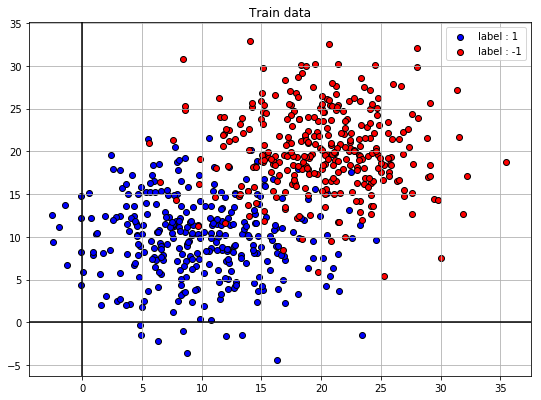

In [646]:
(X_train, Y_train), (X_test, Y_test) = generate_normal(800, seed=2020)
plot(X_train, Y_train)

Train accuracy : 92.65625%


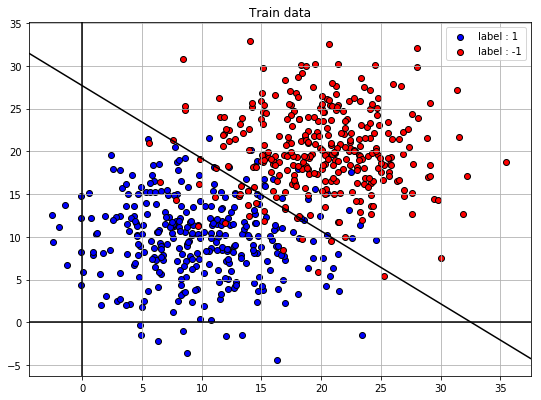

In [647]:
model = LeastSquare(X_train, Y_train, bias=True)
model.fit()
train_acc = model.get_accuracy(X_train, Y_train)
print('Train accuracy : {}%'.format(train_acc))
draw_boundary(X_train, Y_train, model)

Test accuracy : 90.625%


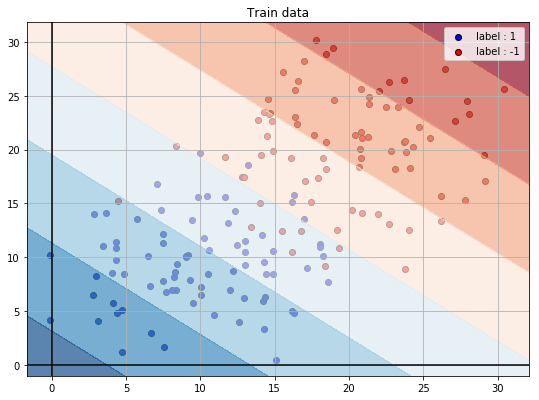

In [648]:
test_acc = model.get_accuracy(X_test, Y_test) # Test 데이터에 대한 성능
print('Test accuracy : {}%'.format(test_acc))
draw_boundary(X_test, Y_test, model, 'Test data', True)

* 위와 같이 bias항을 추가하면 원점을 중심으로 하지않는 데이터셋에 대해서도 학습을 할 수 있다.
* 그러나 대부분의 상황에서 데이터에 정규화과정을 거치기때문에(데이터 전처리) 실제로는 성능 차이가 크게 나지는 않는다.

## 1-3. Regularization

In [649]:
class LeastSquare:
    def __init__(self, data, labels, bias=False, weight_decay=0):
        if bias == True:
            self.data = self.add_bias(data)
        else:
            self.data = data
        self.labels = labels.reshape(-1, 1)
        self.add_reg(weight_decay)
        self.bias = bias
        
    def fit(self):
        self.w = (np.linalg.inv(self.data.T@self.data)@self.data.T)@self.labels
        
    def predict(self, data):
        if self.bias == True:
            data = self.add_bias(data)
        return data.dot(self.w)
    
    def get_accuracy(self, data, labels):
        z = self.predict(data)
        yhat = np.sign(z)
        n_samples = len(labels)
        n_correct = (yhat == labels.reshape(-1, 1)).sum()
        acc = n_correct / n_samples * 100
        return acc
    
    def add_bias(self, data):
        return np.concatenate((data, np.ones((len(data), 1))), axis=1)
    
    def add_reg(self, weight_decay):
        weight_decay = sqrt(weight_decay)
        add_data = np.diag([weight_decay] * len(self.w))
        add_labels = np.zeros((len(self.w), 1))
        self.data = np.concatenate((self.data, add_data))
        self.labels = np.concatenate((self.labels, add_labels))
        self.data = ###
        self.labels = ###

* ## 람다 값과 train & test 성능의 상관관계

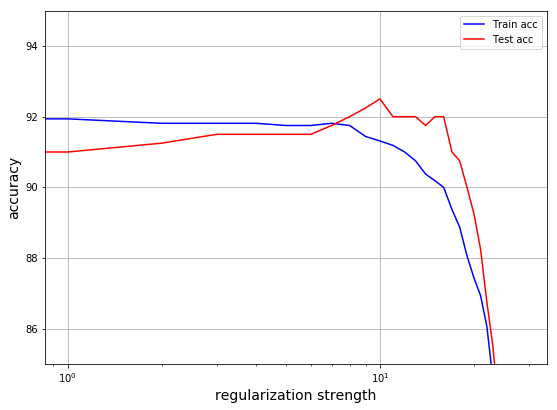

In [650]:
(X_train, Y_train), (X_test, Y_test) = generate_normal(2000, seed=9)
lambda_vec = 10 ** np.linspace(1.2, 3.0, 30)
train_acc = []
test_acc = []
for lambd in lambda_vec:
    model = LeastSquare(X_train, Y_train, bias=True, weight_decay=lambd)
    model.fit()
    train_acc.append(model.get_accuracy(X_train, Y_train))
    test_acc.append(model.get_accuracy(X_test, Y_test))
    
plt.plot(train_acc, color='b', label='Train acc')
plt.plot(test_acc, color='r', label='Test acc')
plt.gca().set_xscale('log')
plt.ylim(bottom=85, top=95)
plt.xlabel('regularization strength', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend()
plt.grid(True)

# 3. Application

## 3.1 Computed Tomography (CT)

### 학습목표
3.1에서는 현대 영상의학 분야의 핵심기술로 활용되고 있는 Computed Tomography(CT)에 대해 다룰 것이다. CT는 최소제곱법을 활용하는 대표적인 응용 분야의 하나로써, 이에 대한 실습을 통해 최소제곱법의 효용성을 이해할 수 있다.

## X-ray
- 전자기파의 일종으로써, 독일의 물리학자 빌헬름 뢴트겐이 1895년에 최초로 발견. 그는 X-ray의 발견과 함께 *영상의학* 이라는 분야를 개척, 이에 대한 공로로 1901년 노벨 물리학상을 수상함.

<img src="./figures/Röntgen.jpeg" width="500" height="500"/>
&nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  빌헬름 뢴트겐   &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  아내의 손을 촬영한 첫 X-ray 촬영 사진

### X-ray의 발견
- 뢴트겐은 기체의 방전현상을 연구하던 도중, 음극선 관에서 나온 어떤 빛이 검정색 판지를 뚫고 나오는 것을 목격. 이후 약 두 달간 이 정체모를 빛에 대한 실험을 지속하여 다음과 같은 사실을 알아냄.

  *(1) 물체는 X-ray 광자를 흡수*, *(2) 그 물체의 강도는 흡수된 광자의 갯수에 비례.*


- X-ray는 최초로 인체의 내부를 들여다볼 수 있게 해주었으나, <font color='red'>평면에 비친 2D 이미지밖에 볼 수 없다는 단점이 존재.</font>

## Computed Tomography (CT)
- 이후 1967년 Godfrey Hounsfield와 Allan Cormack이 3D 물체에 대해서도 내부 밀도를 측정할 수 있는 CT 기술을 개발, 그 공로를 인정받아 1979년 노벨 생리의학상을 수상.

<img src="./figures/CT_inventors.jpeg" width="500" height="500"/>
&nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  Godfrey Hounsfield   &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  Allan Cormack

### CT의 원리
(1) 물체에 X-ray 빔을 여러 다른 각도에서 투사,<br/>
(2) 투영된 이미지를 통해 물체의 강도를 측정,<br/>
(3) 이를 이용하여 물체의 모습을 재구성.

아래는 2-dimensional 물체에 대한 CT 적용 예시 그림:

<img src="./figures/CT_sample1.jpeg" width="500" height="500"/>

- 2x2 grid로 이루어진 물체의 각 부분의 밀도를 각각 $d_1, d_2, d_3, d_4$로 표기,
- 파란색 화살표와 같이 여러 각도에서 방사선을 투과시키고, 반대쪽에서는 투과되어 도달하는 방사선의 세기를 측정함.
- 측정된 방사선의 세기는 방사선이 투과한 물체의 밀도와 투과한 경로 사이의 선적분(line integral)에 비례.
- 선적분한 값과 측정을 통해 얻은 방사선의 세기 사이의 차이를 최소화하는 다음과 같은 <font color='blue'>***최소제곱 (Least-Squares)***</font> 최적화 문제를 고려할 수 있음.

<img src="./figures/CT_sample2.jpeg" width="500" height="500" />

In [2]:
A = np.array([
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [sqrt(2), 0, 0, sqrt(2)],
    [0, sqrt(2), sqrt(2), 0]
])

b = np.array([1.1, 0.95, 1.02, 0.9, -0.03, 2.2]).reshape(6,1)

In [3]:
"""
numpy 라이브러리의 "linalg"(linear algebra) 패키지를 이용하자. "inv"는 역행렬을 찾아주는 함수.
".T"는 transpose 연산, "@"는 행렬 곱 연산을 나타낸다.
"""
d_star = np.linalg.inv(A.T@A)@A.T@b

In [4]:
print(d_star)

[[ 0.11321568]
 [ 0.84163974]
 [ 0.82663974]
 [-0.02178432]]


### 이산화 (Discretization)

<img src="./figures/CT_sample3.jpeg" width="800" height="500"/>

- 물체가 위 그림과 같이 연속적인 형태를 가진다면, 아주 작은 부분들로 이산화하여 하나의 영역 안에서는 물체의 밀도가 일정하다고 가정.
- 이산화 후, 각각의 grid에 대한 선적분은 해당 grid의 밀도와 이 grid를 지나는 방사선의 길이의 곱으로 표현.
- 위에서 계산한 각각의 grid에 대한 선적분을 모두 더하면 반대편에서 측정한 방사선 세기의 값과 같아야 함.

<img src="./figures/CT_sample4.jpeg" width="500" height="500"/>

- 여러 다른 각도에서 방사선을 투사하여 observation matrix와 함께, 아래와 같은 최소제곱 최적화 문제를 얻음.

<img src="./figures/CT_sample5.jpeg" width="500" height="500"/>

- 최소제곱 최적화 문제는 *잘 알려진 closed-form solution이 존재*하는데, 바로 위의 $d^* = (A^T A)^{-1}A^T b$이 바로 그것.
- 다음과 같은 numpy operation을 이용하여 closed-form solution을 쉽게 계산할 수 있음.

d_star = np.linalg.inv(A.T@A)@A.T@b

In [17]:
class ComputedTomography:
    def __init__(self, data, labels):
        self.m = data.shape[0]
        self.d = data.shape[1]
        assert self.m > self.d
        self.w = np.random.randn(self.d, 1)
        self.data = data
        self.labels = labels.reshape(-1, 1)

    def fit(self):
        #################### copy/paste your code ####################
        """앞서 작성한 코드 복사/붙여넣기"""
        ##############################################################

    def visualize(self):
        self.w = self.w.reshape(100, 100)
        plt.imshow(self.w, cmap='gray')
        plt.show()
    
    def predict(self, data):
        return data.dot(self.w)

    def get_accuracy(self, data, labels):
        z = self.predict(data)
        yhat = np.sign(z)
        n_samples = len(labels)
        n_correct = (yhat == labels.reshape(-1, 1)).sum()
        acc = n_correct / n_samples * 100
        return acc

In [4]:
A = np.load("./data/data_matrix.npy")
b = np.load("./data/data_measurements.npy")
print("Data matrix A\n\
Dimension: {}, dtype: {}".format(A.shape, A.dtype))
print("Observed intensity of light beams b\n\
Dimension: {}, dtype: {}".format(b.shape, b.dtype))

Data matrix A
Dimension: (19200, 10000), dtype: float32
Observed intensity of light beams b
Dimension: (19200,), dtype: float32


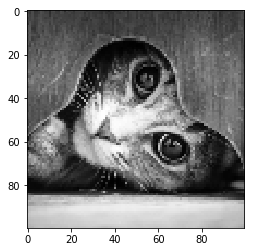

In [22]:
ct = ComputedTomography(A, b)
ct.fit()
ct.visualize()

## 3-2. Matrix completion (보수 중)

In [1082]:
from sklearn.datasets import make_low_rank_matrix

R_original = make_low_rank_matrix(6, 6, random_state=2019)
R = np.array(R_original, copy=True)
R[0, 0] = 0; R[1, 3] = 0; R[3, 2] = 0; R[4, 5] = 0
R

array([[ 0.        ,  0.61452937,  0.24750453, -0.19892304,  0.42721502,
         0.03145252],
       [-0.31077541,  0.17235198, -0.01686515,  0.        ,  0.38611026,
        -0.72204781],
       [ 0.0361328 ,  0.21315172,  0.59379253,  0.26183561, -0.61090325,
        -0.19485996],
       [ 0.42586344, -0.67810143,  0.        , -0.03583527,  0.15244263,
        -0.36263124],
       [-0.13962456, -0.11562184,  0.41497158,  0.57959611,  0.42804496,
         0.        ],
       [ 0.57097555,  0.09997397, -0.45263248,  0.58045658, -0.18690662,
        -0.04937534]])

In [1064]:
R =  np.array([
    [4, 3, 0, 2, 5, 0],
    [5, 0, 4, 0, 4, 0],
    [4, 0, 5, 3, 4, 0],
    [0, 3, 0, 3, 0, 5],
    [0, 4, 0, 4, 5, 4],
    [2, 1, 2, 4, 0, 5]
])

In [1083]:
num = 0
for row in R:
    for ele in row:
        if ele:
            num += 1
num

32

In [1084]:
Is_sigular = False
for row in R:
    num_per_row = len(list(filter(lambda x:x, row)))
    if num_per_row == 1:
        Is_sigular = True
        break
for row in R.T:
    num_per_row = len(list(filter(lambda x:x, row)))
    if num_per_row == 1:
        Is_sigular = True
        break
Is_sigular

False

In [1085]:
k = 2
W = np.random.randn(R.shape[0], k)
H = np.random.randn(k ,R.shape[1])

In [1086]:
W, H

(array([[-0.16561471,  0.85595271],
        [-1.3229244 ,  0.50901868],
        [-0.90443946, -0.21988472],
        [-0.04016898,  0.94461871],
        [ 0.14384408,  2.33313044],
        [ 1.53081527,  0.68711147]]),
 array([[ 1.06119791,  1.12006451,  0.07593415,  0.02167326, -0.99343847,
          0.01083234],
        [ 1.70037848,  0.17958964,  0.47840293,  0.43851146,  0.68642955,
         -0.55385584]]))

In [1087]:
np.dot(W, H)

array([[ 1.2796936 , -0.03177892,  0.39691448,  0.37175567,  0.75207925,
        -0.4758684 ],
       [-0.5383602 , -1.3903462 ,  0.14306089,  0.19453844,  1.66364945,
        -0.29625333],
       [-1.3336765 , -1.05251956, -0.17387133, -0.11602412,  0.74756958,
         0.11198724],
       [ 1.56358209,  0.12465188,  0.44885816,  0.41335554,  0.6883196 ,
        -0.52361771],
       [ 4.11985184,  0.5801207 ,  1.12709912,  1.02622201,  1.45862943,
        -1.29065975],
       [ 2.79284752,  1.83800996,  0.44495729,  0.33448401, -1.04911716,
        -0.36397839]])

In [1090]:
for iteration in range(60):
    A = []
    b = []
    zeros = [0] * k * R.shape[0]
    for i, row in enumerate(R):
        for j, ele in enumerate(row):
            if ele:
                zeros[k*i:k*(i+1)] = H.T[j]
                A.append(zeros)
                b.append(ele)
                zeros = [0] * k * R.shape[0]
    A = np.array(A)
    b  = np.array(b).reshape(-1, 1)
    W = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b).reshape(R.shape[0], k)
    
    A = []
    b = []
    zeros = [0] * k * R.shape[1]
    for i, row in enumerate(R.T):
        for j, ele in enumerate(row):
            if ele:
                zeros[k*i:k*(i+1)] = W[j]
                A.append(zeros)
                b.append(ele)
                zeros = [0] * k * R.shape[1]
    A = np.array(A)
    b  = np.array(b).reshape(-1, 1)
    H = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b).reshape(R.shape[1], k).T

In [1091]:
print(W.dot(H))
print(R)

[[ 1.36774934e+02  6.12460741e-01  2.46055082e-01 -1.97057471e-01
   4.25896065e-01  3.15943941e-02]
 [-3.10541123e-01 -5.66835336e-02  1.62777513e-01  2.53115711e-01
   1.86662691e-01 -7.15646904e-01]
 [ 3.60109550e-02 -1.50393024e-02  4.49674243e-02  6.94089978e-02
   5.16932841e-02 -1.96709992e-01]
 [ 4.25245984e-01 -2.66011234e-02  8.49701051e-02  1.29646040e-01
   9.80533345e-02 -3.68803997e-01]
 [-1.39601280e-01 -1.29846477e-01  3.81470478e-01  5.90694668e-01
   4.38061570e-01 -1.67235328e+00]
 [ 5.71575588e-01 -3.25679236e-03  1.82094877e-02  2.57545371e-02
   2.15164530e-02 -7.51389011e-02]]
[[ 0.          0.61452937  0.24750453 -0.19892304  0.42721502  0.03145252]
 [-0.31077541  0.17235198 -0.01686515  0.          0.38611026 -0.72204781]
 [ 0.0361328   0.21315172  0.59379253  0.26183561 -0.61090325 -0.19485996]
 [ 0.42586344 -0.67810143  0.         -0.03583527  0.15244263 -0.36263124]
 [-0.13962456 -0.11562184  0.41497158  0.57959611  0.42804496  0.        ]
 [ 0.57097555  0.0